In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') #to ignore warnings
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows

In [2]:
df = pd.read_csv("/content/loan_CSV.csv") # Loading dataset

In [3]:
df.dropna(axis=1, how='all', inplace= True) # to drop columns with all null values
df = df.loc[:, df.nunique().values!=1] # to take only those rows and columns which are not havinig unique values


In [4]:
#As we do not have to deal with those whose loan_status is Current i.e active, so take only those whose loan status is not current
df = df[df.loan_status!='Current']

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util
0,1077501,1296599,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,13648,83.70%
1,1077430,1314167,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%
2,1077175,1313524,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,2956,98.50%
3,1076863,1277178,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%
5,1075269,1311441,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,7963,28.30%


## Data Exploration

In [ ]:
df.shape

(5255, 20)

In [ ]:
#to Check null and unique values in parallel
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(df.isnull().sum())
null_unique['unique'] = pd.Series(df.nunique())
null_unique

,nulls,unique
id,0,5255
member_id,0,5255
loan_amnt,0,504
funded_amnt_inv,0,865
term,0,2
int_rate,0,37
installment,0,2243
grade,156,7
sub_grade,0,35
emp_title,348,4465


In [ ]:
round((df.isnull().sum()/df.shape[0])*100,2)

id                     0.00
member_id              0.00
loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  2.97
sub_grade              0.00
emp_title              6.62
emp_length             3.52
home_ownership         0.02
annual_inc             0.02
verification_status    0.02
issue_d                0.02
loan_status            0.02
purpose                0.02
title                  0.02
revol_bal              0.02
revol_util             0.08
dtype: float64

In [ ]:
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 0 to 5722
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5255 non-null   int64  
 1   member_id            5255 non-null   int64  
 2   loan_amnt            5255 non-null   int64  
 3   funded_amnt_inv      5255 non-null   float64
 4   term                 5255 non-null   object 
 5   int_rate             5255 non-null   object 
 6   installment          5255 non-null   float64
 7   grade                5099 non-null   object 
 8   sub_grade            5255 non-null   object 
 9   emp_title            4907 non-null   object 
 10  emp_length           5070 non-null   object 
 11  home_ownership       5254 non-null   object 
 12  annual_inc           5254 non-null   float64
 13  verification_status  5254 non-null   object 
 14  issue_d              5254 non-null   object 
 15  loan_status          5254 non-null   o

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt_inv,installment,annual_inc,revol_bal
count,5.255000e+03,5.255000e+03,5255.000000,5255.000000,5255.000000,5254.000000,5254.000000
mean,1.021810e+06,1.249422e+06,12577.197907,12445.698691,369.089916,67570.145097,13848.335173
std,3.821934e+04,4.296176e+04,8094.721241,7957.512345,223.961568,43046.691234,13956.623816
min,4.581650e+05,5.700350e+05,1000.000000,750.000000,31.120000,6000.000000,0.000000
25%,1.001577e+06,1.226996e+06,6075.000000,6035.815000,201.270000,41000.000000,5635.500000
50%,1.027973e+06,1.256174e+06,10800.000000,10700.000000,330.760000,60000.000000,10698.500000
75%,1.049066e+06,1.279973e+06,16150.000000,16000.000000,480.755000,80000.000000,17670.750000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,1283.500000,725000.000000,140967.000000


## Data Cleaning

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'revol_bal', 'revol_util'],
      dtype='object')

In [ ]:
remove_col = ['id', 'member_id','emp_title', 'title','term','installment','sub_grade','issue_d','revol_bal','revol_util']
df.drop(axis=1,labels=remove_col,inplace=True)

In [ ]:
df.head()

,loan_amnt,funded_amnt_inv,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000,4975.0,10.65%,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500,2500.0,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400,2400.0,15.96%,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000,10000.0,13.49%,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
5,5000,5000.0,7.90%,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding


In [ ]:
#to print null and unique values in parallel
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(df.isnull().sum())
null_unique['unique'] = pd.Series(df.nunique())
print(null_unique)
print(df.shape)

                     nulls  unique
loan_amnt                0     504
funded_amnt_inv          0     865
int_rate                 0      37
grade                  156       7
emp_length             185      11
home_ownership           1       3
annual_inc               1    1028
verification_status      1       3
loan_status              1       2
purpose                  1      13
(5255, 10)


## Data Analsis

In [ ]:
df['loan_status'].value_counts()

Fully Paid     4309
Charged Off     945
Name: loan_status, dtype: int64

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose'],
      dtype='object')

In [ ]:
df['verification_status'].value_counts()

Verified           1955
Not Verified       1695
Source Verified    1604
Name: verification_status, dtype: int64

# Bivariate Analysis

In [ ]:
# function to check behaviour of different columns with loan status

def proportion_plot(data, feature, title):
    #creating list of unique values of feature of dataset
    values_list = data[feature].unique().to_list()
    values_list.sort()
    value_prop = {}
    for value in values_list:
        prop = len(data[(data[feature] == value) & (data['loan_status'] == 'Charged Off')].index) / len(data[(data[feature] == value)
                                                                                                  & (data['loan_status'] == 'Fully Paid')].index) * 100
        value_prop[value] = (round(prop,2))

    sns.set_theme(style='whitegrid')
    ax = sns.barplot(x = list(value_prop.keys()), y = list(value_prop.values()), palette='colorblind')
    ax.bar_label(ax.containers[0])
    plt.xlabel(feature)
    plt.ylabel('percent value')
    plt.xticks(rotation = 45)
    plt.title('Defaulters proportion vs ' + title)
    #plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


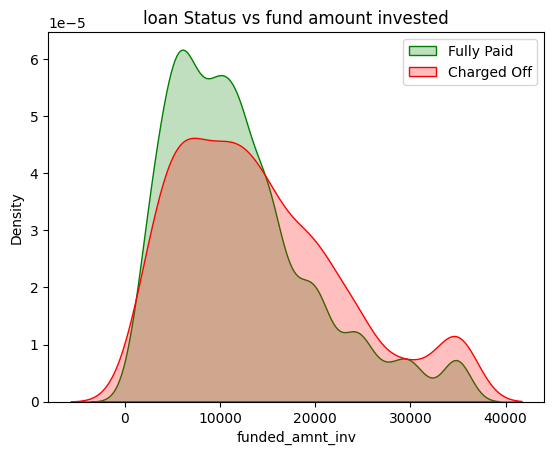

In [ ]:
sns.kdeplot(data = df[df['loan_status'] == 'Fully Paid'], x = 'funded_amnt_inv', shade=True, color='green')
sns.kdeplot(data = df[df['loan_status'] == 'Charged Off'], x = 'funded_amnt_inv', shade = True, color='red')
plt.legend(['Fully Paid', 'Charged Off'])
plt.title('loan Status vs fund amount invested')
plt.show()

In [ ]:
#checking datatypes of all columns
datatp = pd.DataFrame()
datatp['Original DataTypes'] = pd.Series(df.dtypes)
datatp.transpose()

,loan_amnt,funded_amnt_inv,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
Original DataTypes,int64,float64,object,object,object,object,float64,object,object,object


In [ ]:
#Altering datatypes
category_col = ['grade', 'home_ownership', 'verification_status', 'loan_status',
 'purpose']
df[category_col] = df[category_col].astype('category')
datatp['Altered Datatypes'] = pd.Series(df.dtypes)
datatp.transpose()

,loan_amnt,funded_amnt_inv,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
Original DataTypes,int64,float64,object,object,object,object,float64,object,object,object
Altered Datatypes,int64,float64,object,category,object,category,float64,category,category,category


In [ ]:
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')


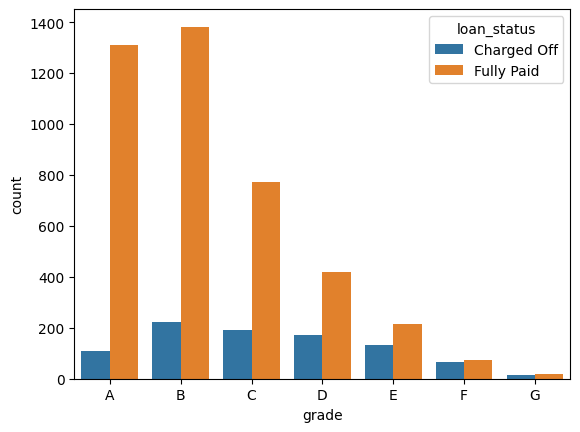

In [ ]:
sns.countplot(data = df, x = 'grade', hue = 'loan_status')
plt.show()

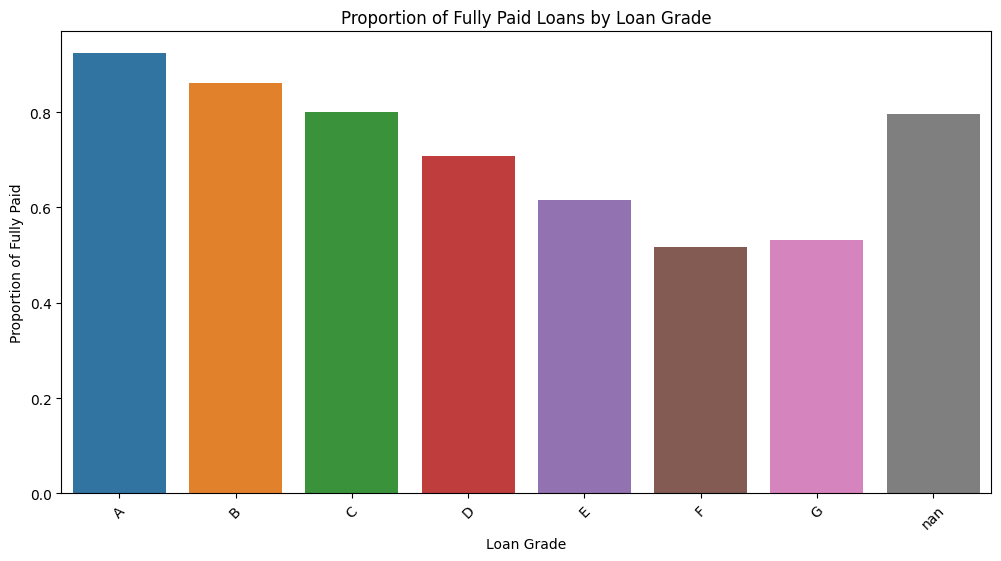

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def proportion_plot(data, feature, title):
    # Check if the feature column contains numeric values and convert them to strings
    if data[feature].dtype != 'object':
        data[feature] = data[feature].astype(str)

    # Creating a list of unique values of the feature in the dataset
    values_list = data[feature].unique().tolist()
    values_list.sort()

    value_prop = {}
    for value in values_list:
        value_count = data[data[feature] == value]['loan_status'].value_counts()
        total_count = len(data[data[feature] == value])
        prop = value_count / total_count
        value_prop[value] = prop

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=values_list, y=[value_prop[value]['Fully Paid'] for value in values_list])
    plt.xlabel(title)
    plt.ylabel('Proportion of Fully Paid')
    plt.title(f'Proportion of Fully Paid Loans by {title}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

# Example usage
proportion_plot(df, 'grade', 'Loan Grade')
plt.savefig('grade_vs_loan_status')


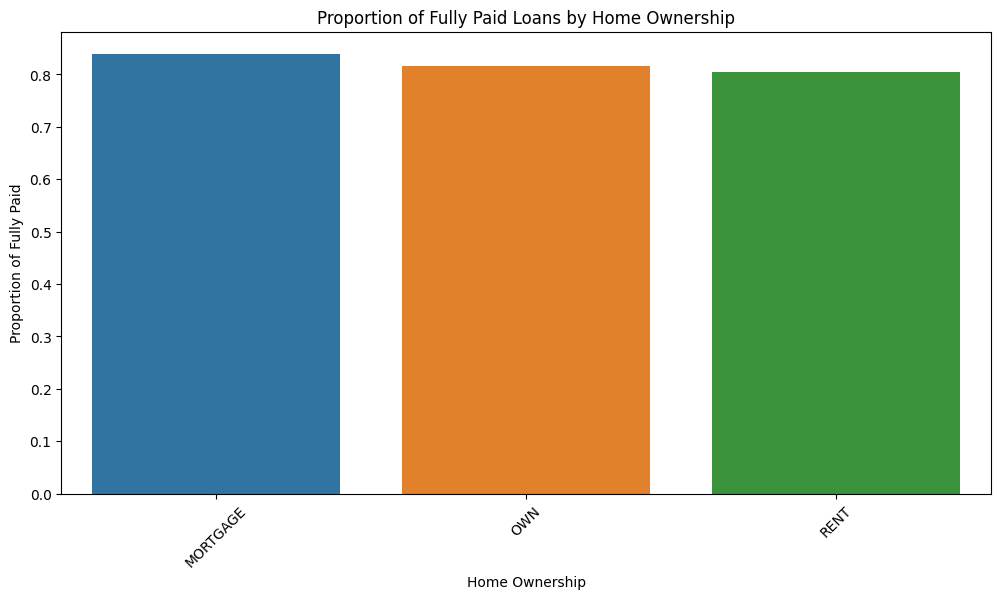

<Figure size 640x480 with 0 Axes>

In [ ]:
proportion_plot(df[df['home_ownership'].isin(['MORTGAGE', 'RENT', 'OWN'])], 'home_ownership', 'Home Ownership')
plt.savefig('home_ownership')

<Figure size 400x200 with 0 Axes>

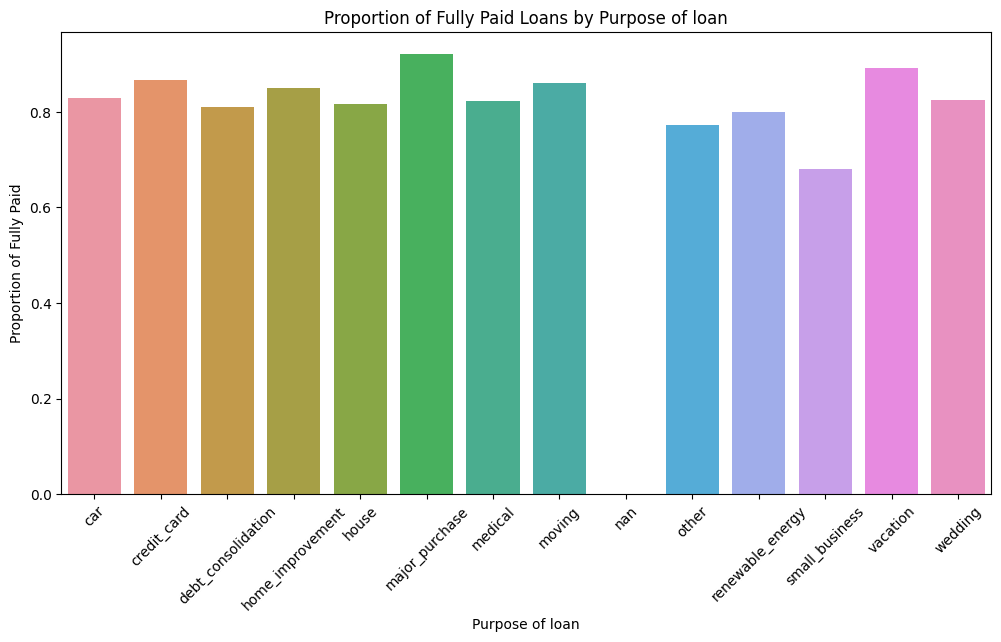

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(4,2))
proportion_plot(df, 'purpose', 'Purpose of loan')
plt.savefig('purpose')

- Loan taken for purpose of Small business have maximium number of defaulters (37.09%) thereafter renewable energy (22.89%) and then education (21.05%). People taking laon for car, credit card, major purchase and wedding show are showing least tendency to default loan.

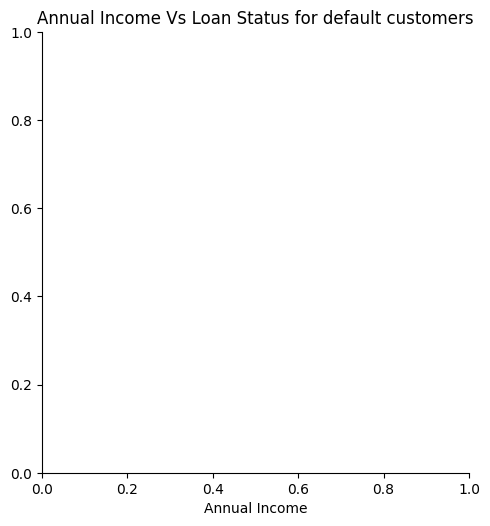

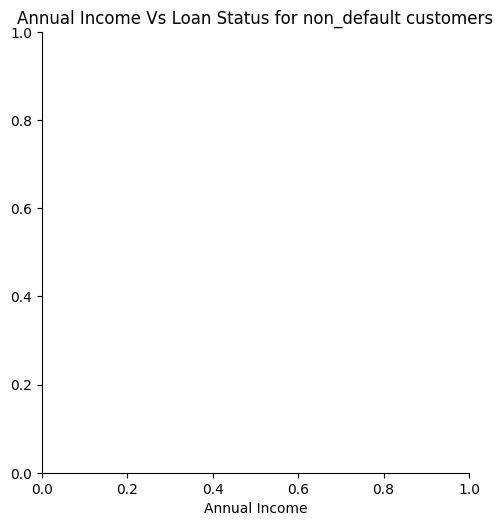

In [ ]:
# Checking distribution of employee salary after removing outliers for each loan status category

# removing outliers for analysis (above 1.5 times of IQR + 75th percentile value)
income_iqr = np.percentile(df['annual_inc'], 75) - np.percentile(df['annual_inc'], 25)
#calculatin above limit for income
income_limit = np.percentile(df['annual_inc'], 75) + 1.5*income_iqr

df1 = df[df['annual_inc'] <= income_limit]
sns.displot(data = df1[df1['loan_status'] == 'Charged Off'], x = 'annual_inc', bins=15, )
plt.title('Annual Income Vs Loan Status for default customers')
plt.xlabel('Annual Income')
plt.savefig('income_c_vs_loan_status')
sns.displot(data = df1[df1['loan_status'] == 'Fully Paid'], x = 'annual_inc', bins=15, )
plt.title('Annual Income Vs Loan Status for non_default customers')
plt.xlabel('Annual Income')
plt.savefig('income_p_vs_loan_status')
plt.show()

# Univariate Analysis

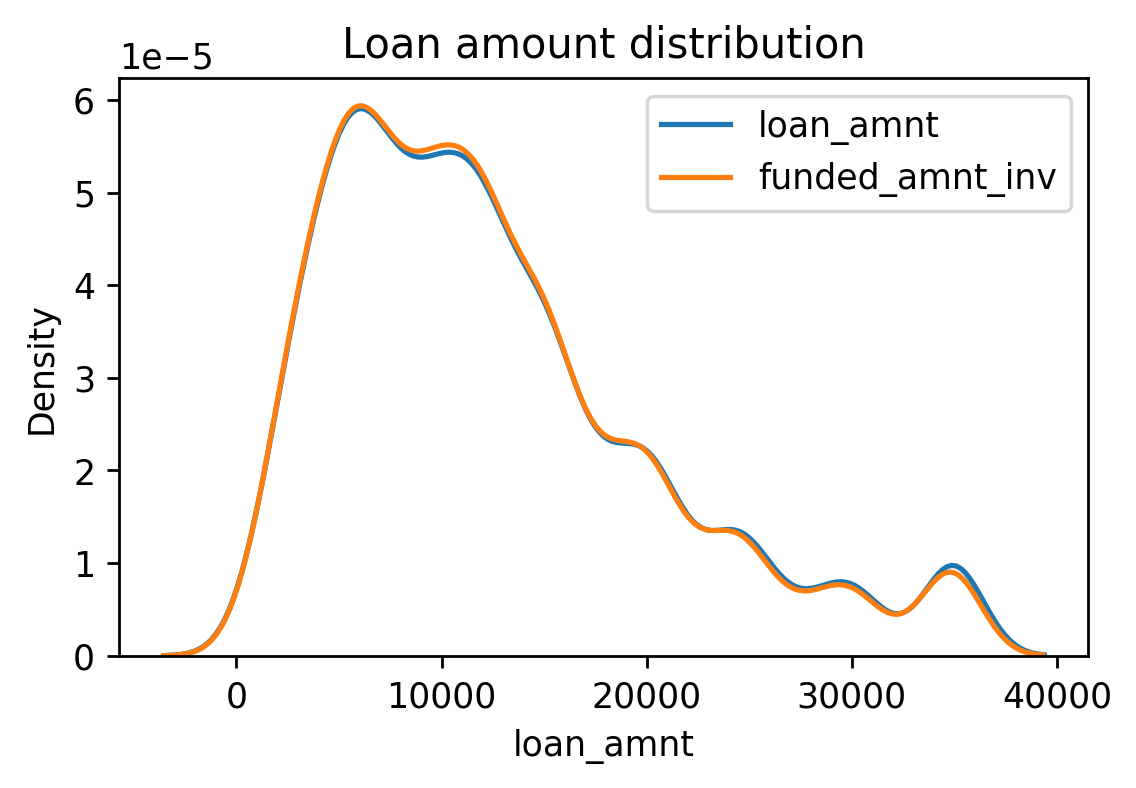

In [ ]:
# checking distribution of loan_amnt, funded_amnt, funded_amnt_inv
funding_variable = ['loan_amnt', 'funded_amnt_inv']
plt.figure(figsize=(5,3), dpi = 250)
for i,j in enumerate(funding_variable):
    mean = df[j].mean()
    median = df[j].median()
    mini = np.min(df[j])
    maxi = np.max(df[j])

    #ax = plt.subplot(1,3,i+1)
    sns.kdeplot(df[j])

plt.title('Loan amount distribution')
plt.legend(funding_variable)
plt.savefig('loan_amt_distribution')
plt.show()

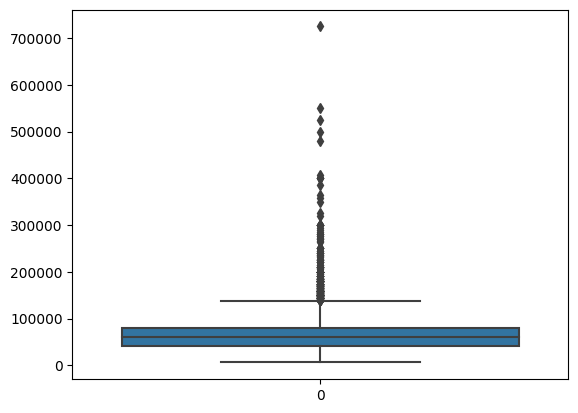

In [ ]:
#Checking distribution of annual income of customers
sns.boxplot(df['annual_inc'])
plt.show()

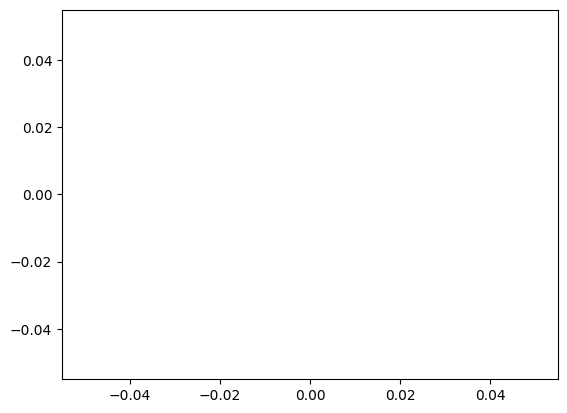

In [ ]:
#distribution of income after removing outliers
sns.kdeplot(data = df[df['annual_inc'] <= income_limit], x = 'annual_inc', shade=True)
plt.show()

In [ ]:
df['annual_inc'].describe()

count      5254.000000
mean      67570.145097
std       43046.691234
min        6000.000000
25%       41000.000000
50%       60000.000000
75%       80000.000000
max      725000.000000
Name: annual_inc, dtype: float64

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose'],
      dtype='object')

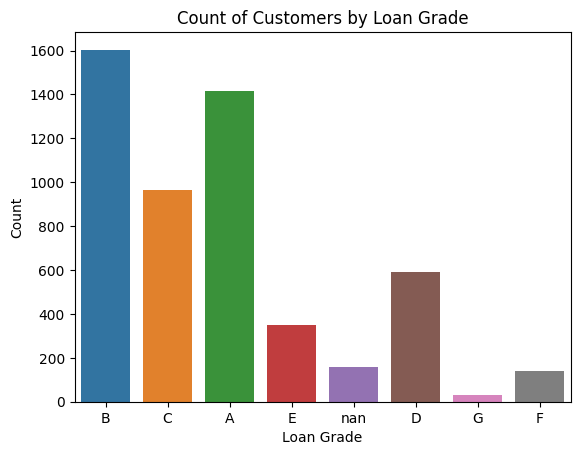

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of customers based on the rate of interest the loan has been disbursed.
sns.countplot(data=df, x='grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Count of Customers by Loan Grade')
plt.show()


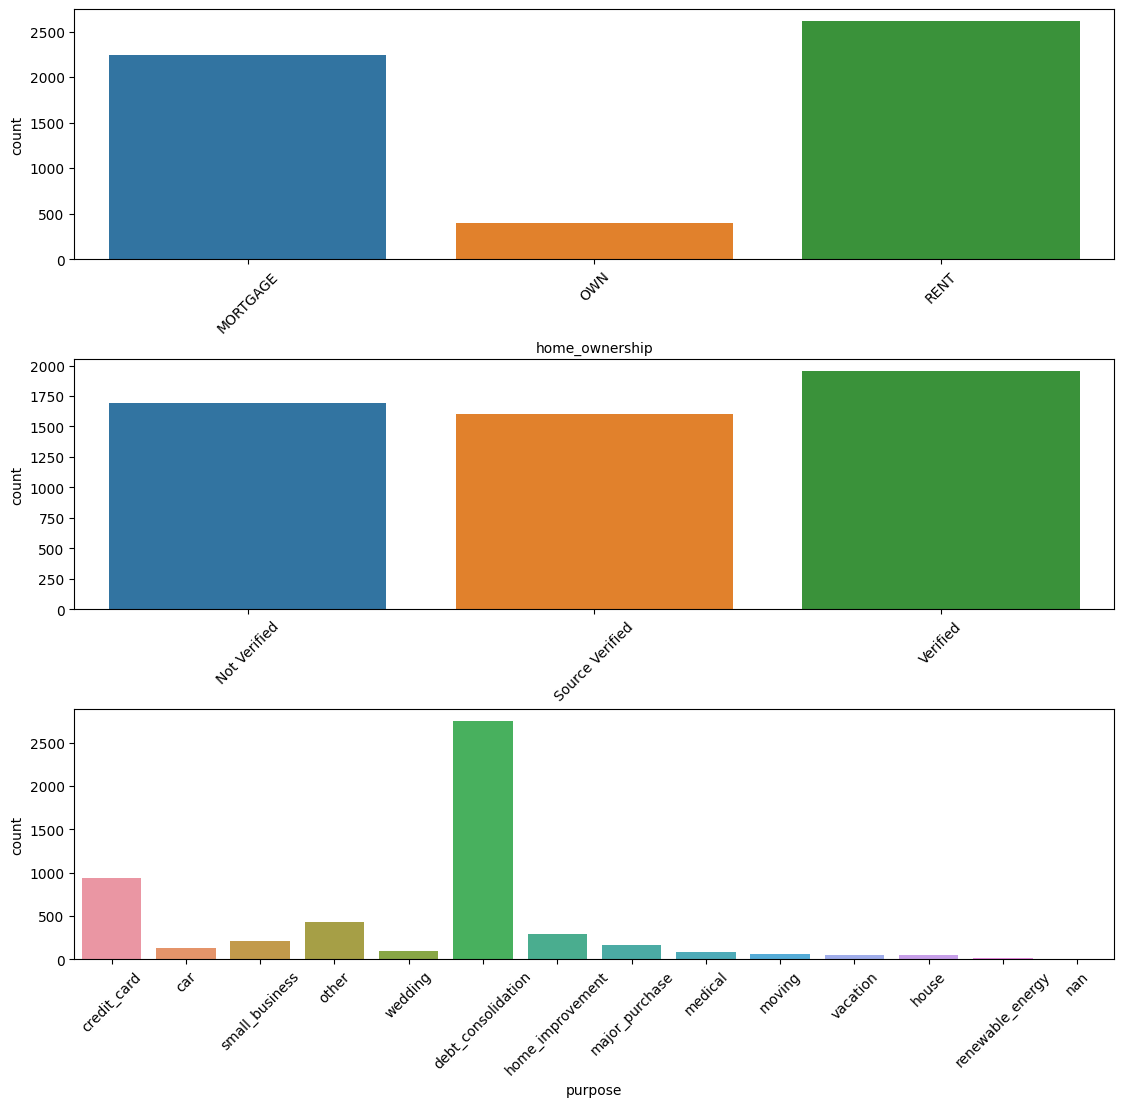

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying the number of customers based on demography, home ownership, purpose of loan, and verification status.
# These are the attributes of the customer available before the issuance of the loan.
attributes_col = ['home_ownership', 'verification_status', 'purpose']

plt.figure(figsize=(13, 20))
for i, attr in enumerate(attributes_col):
    plt.subplot(6, 1, i + 1)
    sns.countplot(data=df, x=attr)
    plt.xticks(rotation=45)
    plt.subplots_adjust(left=0.1, bottom=0.2, top=1.2, wspace=0.4, hspace=0.4)
    plt.savefig(f'{attr}.png')

plt.show()


In [ ]:
#Export Data
df.to_csv("clean_Data")